In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as preproc
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import semopy
from PIL import Image
import numpy as np
import random, sys
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')

r_seed = 4490907375869670109 #random.randrange(sys.maxsize)
print('seed:', r_seed)

gum.initRandom(0) 
random.seed(r_seed)

seed: 4490907375869670109


# <center>Initial Bayesian Network

In [ ]:
df_bn1=pd.read_csv('Data_num.csv')


In [4]:
bn_com = gum.fastBN(
'Gender{Women|Men}->Age{15_to_24|25_to_64|65_and_over}->Disability{Developmental|Dexterity|Flexibility|Hearing|Learning|Memory|MentalHealth|Mobility|Pain|Seeing|Unknown}->Interaction_family{Always|Often|Sometimes|Never};'+
  
'Interaction_services {Always|Often|Sometimes|Never}<-Disability->Interaction_healthcare{Always|Often|Sometimes|Never};'
)

In [ ]:
com_values = ['Interaction_services', 'Interaction_family', 'Interaction_healthcare']

# Defining the plot parameters
def nodevalue(n):
    return 0.1 if n in com_values else 0.1
def arcvalue(a):
    return 0.8
def arcvalue2(a):
    return (a[0]+a[1]+4)/20

mycmap=plt.get_cmap('Greens')
formyarcs=plt.get_cmap('Blues')
c_p=gnb.flow.row(gnb.getBN(bn_com,size='8',
                       nodeColor={n:nodevalue(n) for n in bn_com.names()},
                       arcColor={a:arcvalue2(a) for a in bn_com.arcs()},
                       cmapNode=mycmap,
                       cmapArc=formyarcs),
             gnb.getInference(bn_com,size='16',
                              nodeColor={n:nodevalue(n) for n in bn_com.names()},
                              arcColor={a:arcvalue2(a) for a in bn_com.arcs()},
                              arcWidth={a:arcvalue(a) for a in bn_com.arcs()},
                              cmapNode=mycmap,
                              cmapArc=formyarcs)
                 #, *[bn_com.cpt(x) for x in bn_com.nodes()]
              )

In [6]:
bn_com.cpt('Gender').fillWith([0.5517, 0.4483])


(pyAgrum.Potential<double>@0x2a0912276a0) 
  Gender           |
Women    |Men      |
---------|---------|
 0.5517  | 0.4483  |

In [ ]:
bn_com.cpt('Age').fillWith([0.1293268, 0.6194692, 0.251204, 0.1105809,0.5998571,0.2895619])

(pyAgrum.Potential<double>@0x2a091227640) 
      ||  Age                        |
Gender||15_to_24 |25_to_64 |65_and_ov|
------||---------|---------|---------|
Women || 0.1293  | 0.6195  | 0.2512  |
Men   || 0.1106  | 0.5999  | 0.2896  |

#### Data by Disability

In [8]:
# Data by Age
df_bn_d=df_bn1.copy()
df_bn_d['SUM'] = df_bn_d.groupby(['Age'])['VALUE'].transform('sum')
df_bn_d['Probability'] = (df_bn_d['VALUE'] / df_bn_d['SUM'])
df_bn_d = df_bn_d.groupby(['Age','Disability'])[['Probability']].sum().reset_index()
#df_bn_d

In [9]:
gen_values = ['Women', 'Men']
age_values = ['15_to_24', '25_to_64', '65_and_over']
dis_values = ["Developmental","Dexterity","Flexibility","Hearing","Learning","Memory","MentalHealth","Mobility",
              "Pain","Seeing","Unknown"]
frq_values = ["Never", "Sometimes", "Often", "Always"]

In [10]:
for a in age_values:
    for d in dis_values:
        bnd = (df_bn_d[(df_bn_d['Age'] == a)])
        #print(dfd)
        DV = bnd.loc[bnd["Disability"]=='Developmental',"Probability"].values[0]
        DX = bnd.loc[bnd["Disability"]=='Dexterity',"Probability"].values[0]
        FL = bnd.loc[bnd["Disability"]=='Flexibility',"Probability"].values[0]
        HE = bnd.loc[bnd["Disability"]=='Hearing',"Probability"].values[0]
        LE = bnd.loc[bnd["Disability"]=='Learning',"Probability"].values[0]
        ME = bnd.loc[bnd["Disability"]=='Memory',"Probability"].values[0]
        MH = bnd.loc[bnd["Disability"]=='MentalHealth',"Probability"].values[0]
        MO = bnd.loc[bnd["Disability"]=='Mobility',"Probability"].values[0]
        PA = bnd.loc[bnd["Disability"]=='Pain',"Probability"].values[0]
        SE = bnd.loc[bnd["Disability"]=='Seeing',"Probability"].values[0]
        UK = bnd.loc[bnd["Disability"]=='Unknown',"Probability"].values[0]
        
        bn_com.cpt('Disability')[{"Age":a}] = [DV, DX, FL, HE, LE, ME, MH, MO, PA, SE, UK]

In [11]:
bn_com.cpt('Disability')

(pyAgrum.Potential<double>@0x2a091227420) 
      ||  Disability                                                                                                 |
Age   ||Developme|Dexterity|Flexibili|Hearing  |Learning |Memory   |MentalHea|Mobility |Pain     |Seeing   |Unknown  |
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
15_to_|| 0.0697  | 0.1290  | 0.1141  | 0.1290  | 0.0479  | 0.0596  | 0.0561  | 0.1088  | 0.0700  | 0.0868  | 0.1290  |
25_to_|| 0.0703  | 0.0741  | 0.0995  | 0.0713  | 0.0722  | 0.0708  | 0.1102  | 0.0912  | 0.1440  | 0.0993  | 0.0970  |
65_and|| 0.1182  | 0.0855  | 0.0936  | 0.0772  | 0.0724  | 0.0734  | 0.0734  | 0.0980  | 0.1039  | 0.0862  | 0.1182  |

#### Data by Barriers, Frequency

In [12]:

gen_values = ['Women', 'Men']
age_values = ['15_to_24', '25_to_64', '65_and_over']
dis_values = ["Developmental","Dexterity","Flexibility","Hearing","Learning","Memory","MentalHealth","Mobility",
              "Pain","Seeing","Unknown"]
frq_values = ["Never", "Sometimes", "Often", "Always"]
bar_val = ['Interaction_family', 'Interaction_healthcare', 'Interaction_services']

In [13]:
# Data by Frequency
df_bn_f=df_bn1.copy()
df_bn_f['SUM'] = df_bn_f.groupby(['Barriers','Frequency'])['VALUE'].transform('sum')
df_bn_f['Probability'] = (df_bn_f['VALUE'] / df_bn_f['SUM'])
df_bn_f = df_bn_f.groupby(['Disability', 'Barriers'])[['Probability']].sum().reset_index()
df_bn_f.head()


,Disability,Barriers,Probability
0,Developmental,Interaction_family,0.353519
1,Developmental,Interaction_healthcare,0.354704
2,Developmental,Interaction_services,0.344918
3,Dexterity,Interaction_family,0.387162
4,Dexterity,Interaction_healthcare,0.388386


In [14]:
# Data by Frequency
df_bn_f=df_bn1.copy()
df_bn_f['SUM'] = df_bn_f.groupby(['Disability','Barriers'])['VALUE'].transform('sum')
df_bn_f['Probability'] = (df_bn_f['VALUE'] / df_bn_f['SUM'])
df_bn_f = df_bn_f.groupby(['Disability','Frequency', 'Barriers'])[['Probability']].sum().reset_index()
df_bn_f.head()

gen_values = ['Women', 'Men']
age_values = ['15_to_24', '25_to_64', '65_and_over']
dis_values = ["Developmental","Dexterity","Flexibility","Hearing","Learning","Memory","MentalHealth","Mobility",
              "Pain","Seeing","Unknown"]
frq_values = ["Never", "Sometimes", "Often", "Always"]
bar_val = ['Interaction_family', 'Interaction_healthcare', 'Interaction_services']

for d in dis_values:
    for f in bar_val:
        bnf = (df_bn_f[(df_bn_f['Barriers'] == f) & (df_bn_f['Disability'] == d)])
        #print(dff)
        AL = bnf.loc[bnf["Frequency"]=='Always',"Probability"].values[0]
        OF = bnf.loc[bnf["Frequency"]=='Often',"Probability"].values[0]
        SM = bnf.loc[bnf["Frequency"]=='Sometimes',"Probability"].values[0]
        NW = bnf.loc[bnf["Frequency"]=='Never',"Probability"].values[0]

        bn_com.cpt(f)[{"Disability":d}] = [AL, OF, SM, NW]

In [15]:
df_bn_f

,Disability,Frequency,Barriers,Probability
0,Developmental,Always,Interaction_family,0.354477
1,Developmental,Always,Interaction_healthcare,0.354241
2,Developmental,Always,Interaction_services,0.355334
3,Developmental,Never,Interaction_family,0.147925
4,Developmental,Never,Interaction_healthcare,0.152516
...,...,...,...,...
127,Unknown,Often,Interaction_healthcare,0.268476
128,Unknown,Often,Interaction_services,0.268566
129,Unknown,Sometimes,Interaction_family,0.268465
130,Unknown,Sometimes,Interaction_healthcare,0.268476


In [16]:
bn_com.cpt('Interaction_family')

(pyAgrum.Potential<double>@0x2a0912264b0) 
      ||  Interaction_family                   |
Disabi||Always   |Often    |Sometimes|Never    |
------||---------|---------|---------|---------|
Develo|| 0.3545  | 0.3545  | 0.1431  | 0.1479  |
Dexter|| 0.3219  | 0.2727  | 0.1545  | 0.2509  |
Flexib|| 0.2923  | 0.1654  | 0.1832  | 0.3591  |
Hearin|| 0.3473  | 0.1894  | 0.1929  | 0.2703  |
Learni|| 0.4877  | 0.2042  | 0.1218  | 0.1863  |
Memory|| 0.4745  | 0.2654  | 0.1084  | 0.1518  |
Mental|| 0.3321  | 0.1820  | 0.1767  | 0.3091  |
Mobili|| 0.3106  | 0.1744  | 0.1408  | 0.3742  |
Pain  || 0.2491  | 0.1299  | 0.1385  | 0.4825  |
Seeing|| 0.3384  | 0.2910  | 0.1331  | 0.2375  |
Unknow|| 0.2685  | 0.2685  | 0.2685  | 0.1946  |

In [17]:
ie=gum.LazyPropagation(bn_com)
ie.setEvidence({'Age':'15_to_24', 'Gender': 'Women', 'Disability':'Mobility'})
ie.makeInference()


In [18]:
gnb.flow.row(bn_com.cpt('Interaction_services'), bn_com.cpt('Interaction_family'), bn_com.cpt('Interaction_healthcare'))

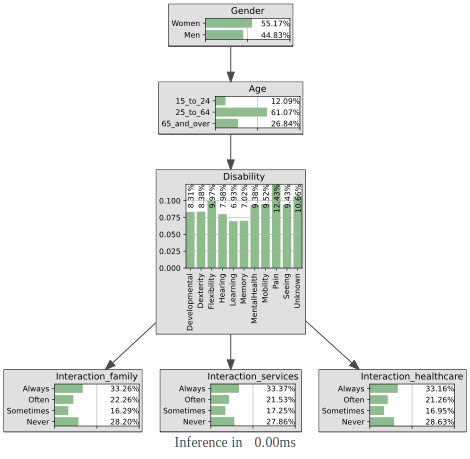

(pyAgrum.Potential<double>@0x2a091227420) 
      ||  Disability                                                                                                 |
Age   ||Developme|Dexterity|Flexibili|Hearing  |Learning |Memory   |MentalHea|Mobility |Pain     |Seeing   |Unknown  |
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
15_to_|| 0.0697  | 0.1290  | 0.1141  | 0.1290  | 0.0479  | 0.0596  | 0.0561  | 0.1088  | 0.0700  | 0.0868  | 0.1290  |
25_to_|| 0.0703  | 0.0741  | 0.0995  | 0.0713  | 0.0722  | 0.0708  | 0.1102  | 0.0912  | 0.1440  | 0.0993  | 0.0970  |
65_and|| 0.1182  | 0.0855  | 0.0936  | 0.0772  | 0.0724  | 0.0734  | 0.0734  | 0.0980  | 0.1039  | 0.0862  | 0.1182  |

In [19]:
evs = {'Gender':0}
evs ={}
gnb.showInference(bn_com, evs=evs)
bn_com.cpt('Disability')

# <center> Synthetic data

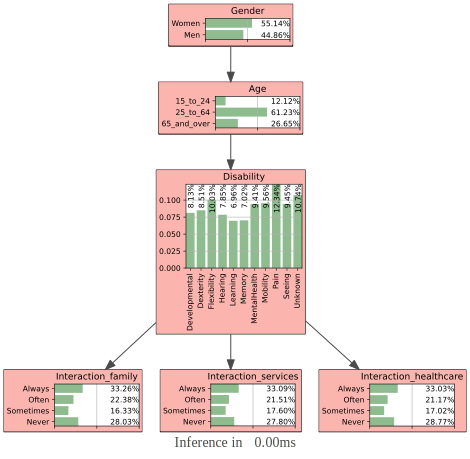

In [ ]:
df_from_synth = pd.read_csv('synth_BN_new_v5.csv')

import pyAgrum.skbn as skbn

learner=gum.BNLearner(df_from_synth, bn_com)
learner.useMIIC()
learner.useScoreBIC() 
learner.useSmoothingPrior(1)
bn_synth=learner.learnParameters(bn_com.dag())

gnb.showInference(bn_synth, nodeColor={n:nodevalue(n) for n in bn_synth.names()})

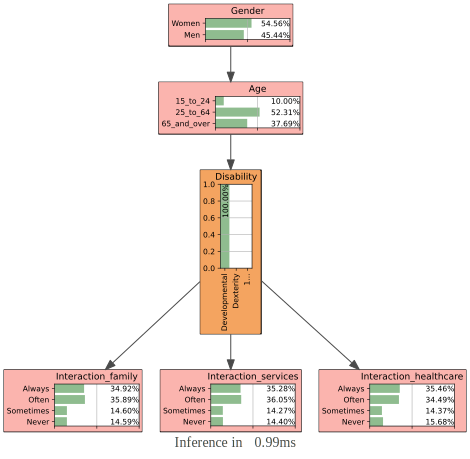

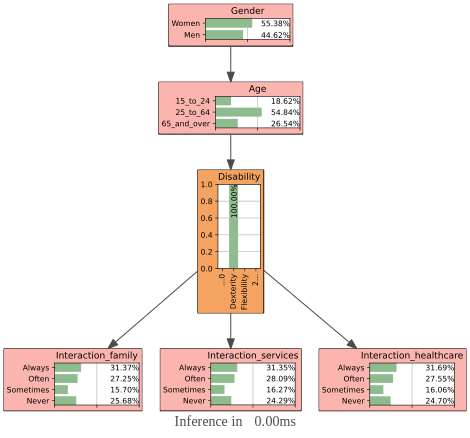

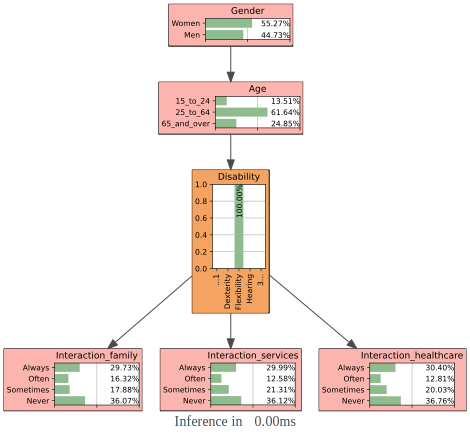

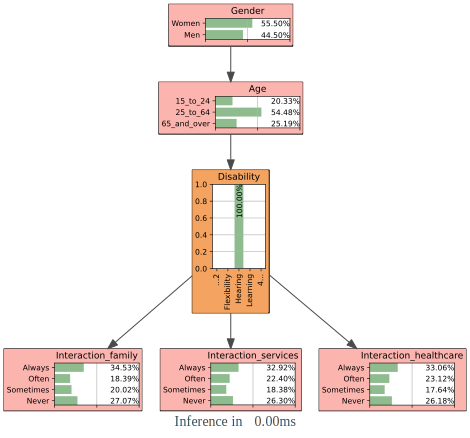

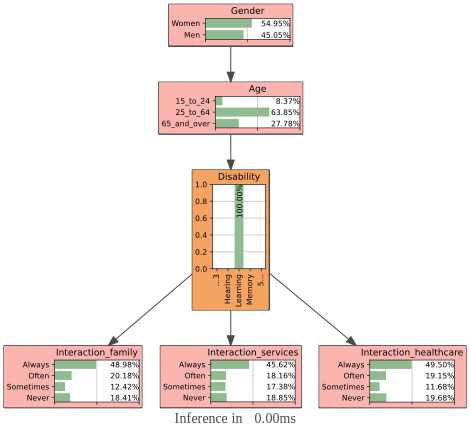

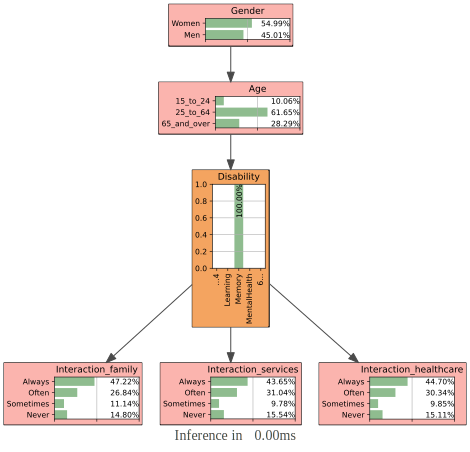

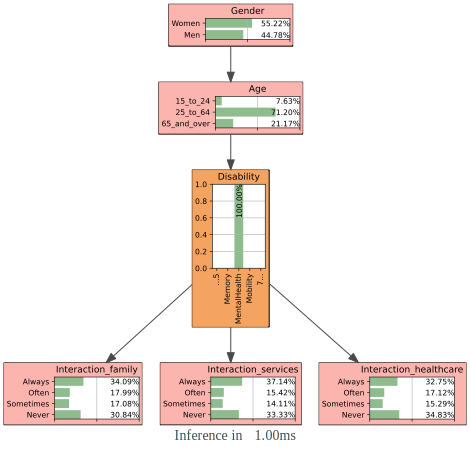

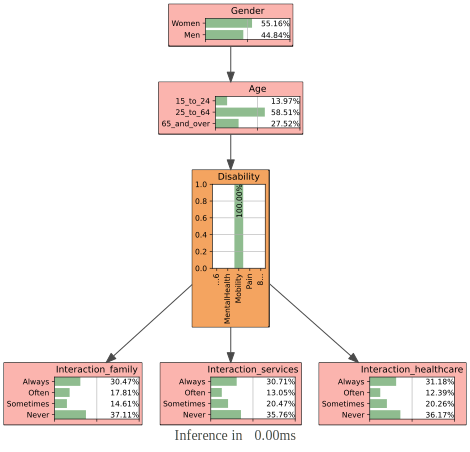

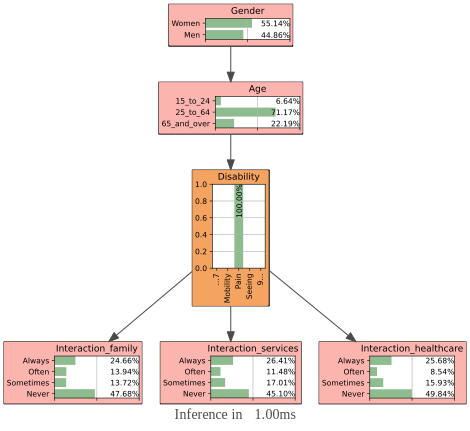

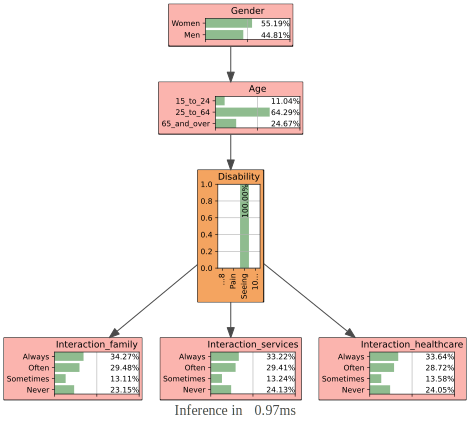

In [ ]:
for i in range(0, 10):
    evs = {'Disability':i}
    gnb.showInference(bn_synth, evs=evs, nodeColor={n:nodevalue(n) for n in bn_synth.names()})
    

In [22]:
import pyAgrum.lib.explain as explain
explain.showInformation(bn_synth, {}, size="14")
explain.showInformation(bn_com, {}, size="14")

In [ ]:
import pyAgrum.lib.explain as exp
info_str = exp.getInformation(bn_synth)

import re
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML string
soup = BeautifulSoup(info_str, 'html.parser')

# Extract node information into a table
node_entries = []
for node in soup.find_all('g', class_='node'):
    title_tag = node.find('title')
    if title_tag:
        node_name = title_tag.get_text().strip()
    a_tag = node.find('a')
    if a_tag and a_tag.has_attr('xlink:title'):
        title_attr = a_tag['xlink:title']
        # Expected format: "(<order>) <NodeName> : <EntropyValue>"
        match = re.search(r'\((.*?)\)\s*(.*?)\s*:\s*([0-9.]+)', title_attr)
        if match:
            order, name, entropy_val = match.groups()
            node_entries.append({'Node': name, 'Entropy': float(entropy_val)})
node_table_synth = pd.DataFrame(node_entries)
print("Extracted Node Entropy Table:")
print(node_table_synth)

# Extract edge (mutual information) information into a table
edge_entries = []
for edge in soup.find_all('g', class_='edge'):
    title_tag = edge.find('title')
    if title_tag:
        edge_text = title_tag.get_text().strip()
        # Expected format: "Source->Target"
    a_tag = edge.find('a')
    if a_tag and a_tag.has_attr('xlink:title'):
        title_attr = a_tag['xlink:title']
        # Expected format: "4 → 5 : 0.13273987362997536"
        match = re.search(r'(.+?)→(.+?)\s*:\s*([0-9.]+)', title_attr)
        if match:
            source, target, mi_val = match.groups()
            # Clean up extra spaces
            source = source.strip()
            target = target.strip()
            edge_entries.append({'Source': source, 'Target': target, 'Mutual Information': float(mi_val)})
edge_table_synth = pd.DataFrame(edge_entries)
print("\nExtracted Edge Mutual Information Table:")
print(edge_table_synth)

Extracted Node Entropy Table:
                     Node  Entropy
0                     Age  1.31074
1              Disability  3.43891
2                  Gender  0.99237
3    Interaction_services  1.95936
4  Interaction_healthcare  1.95401
5      Interaction_family  1.95282

Extracted Edge Mutual Information Table:
  Source Target  Mutual Information
0      1      2            0.019586
1      0      1            0.001880
2      2      4            0.062188
3      2      5            0.070676
4      2      3            0.057508


In [24]:
import pyAgrum.lib.explain as exp
info_str = exp.getInformation(bn_com)

import re
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML string
soup = BeautifulSoup(info_str, 'html.parser')

# Extract node information into a table
node_entries = []
for node in soup.find_all('g', class_='node'):
    title_tag = node.find('title')
    if title_tag:
        node_name = title_tag.get_text().strip()
    a_tag = node.find('a')
    if a_tag and a_tag.has_attr('xlink:title'):
        title_attr = a_tag['xlink:title']
        # Expected format: "(<order>) <NodeName> : <EntropyValue>"
        match = re.search(r'\((.*?)\)\s*(.*?)\s*:\s*([0-9.]+)', title_attr)
        if match:
            order, name, entropy_val = match.groups()
            node_entries.append({'Node': name, 'Entropy': float(entropy_val)})
node_table_real = pd.DataFrame(node_entries)
print("Extracted Node Entropy Table:")
print(node_table_real)

# Extract edge (mutual information) information into a table
edge_entries = []
for edge in soup.find_all('g', class_='edge'):
    title_tag = edge.find('title')
    if title_tag:
        edge_text = title_tag.get_text().strip()
        # Expected format: "Source->Target"
    a_tag = edge.find('a')
    if a_tag and a_tag.has_attr('xlink:title'):
        title_attr = a_tag['xlink:title']
        # Expected format: "4 → 5 : 0.13273987362997536"
        match = re.search(r'(.+?)→(.+?)\s*:\s*([0-9.]+)', title_attr)
        if match:
            source, target, mi_val = match.groups()
            # Clean up extra spaces
            source = source.strip()
            target = target.strip()
            edge_entries.append({'Source': source, 'Target': target, 'Mutual Information': float(mi_val)})
edge_table_real = pd.DataFrame(edge_entries)
print("\nExtracted Edge Mutual Information Table:")
print(edge_table_real)


Extracted Node Entropy Table:
                     Node  Entropy
0                     Age  1.31236
1              Disability  3.43911
2                  Gender  0.99227
3    Interaction_services  1.95632
4  Interaction_healthcare  1.95360
5      Interaction_family  1.95211

Extracted Edge Mutual Information Table:
  Source Target  Mutual Information
0      1      2            0.019500
1      0      1            0.001608
2      2      4            0.060757
3      2      5            0.070139
4      2      3            0.058323


In [ ]:
edge_table_synth, node_table_real, node_table_synth, edge_table_real
merged_node_table = pd.merge(node_table_synth, node_table_real, on='Node', suffixes=('_synth', '_real'))

print("\nMerged Node Table:")
print(merged_node_table)


Merged Node Table:
                     Node  Entropy_synth  Entropy_real
0                     Age        1.31074       1.31236
1              Disability        3.43891       3.43911
2                  Gender        0.99237       0.99227
3    Interaction_services        1.95936       1.95632
4  Interaction_healthcare        1.95401       1.95360
5      Interaction_family        1.95282       1.95211


In [ ]:
merged_edge_table = pd.merge(edge_table_synth, edge_table_real, on=['Source', 'Target'], suffixes=('_synth', '_real'))

print("\nMerged Edge Table:")
print(merged_edge_table)



Merged Edge Table:
  Source Target  Mutual Information_synth  Mutual Information_real
0      1      2                  0.019586                 0.019500
1      0      1                  0.001880                 0.001608
2      2      4                  0.062188                 0.060757
3      2      5                  0.070676                 0.070139
4      2      3                  0.057508                 0.058323
